In [66]:
import pandas as pd
import scipy.stats

df2 = pd.read_csv("t20_matches_forToss.csv")

In [67]:
df = df2[["match_id", "match_details", "result", "scores", "venue", 'innings1', 'innings2', 'winner']]

In [68]:
df['innings1'].head()

0     Nottinghamshire
1           Hampshire
2        Warwickshire
3           Middlesex
4    Northamptonshire
Name: innings1, dtype: object

# toss effect on win

In [69]:
df['winner']
no_win_ing1 = df.loc[(df['winner']==df['innings1'])]['winner'].count()
no_win_ing2 = df.loc[(df['winner']==df['innings2'])]['winner'].count()

# Effect of batting first and second in the result of match

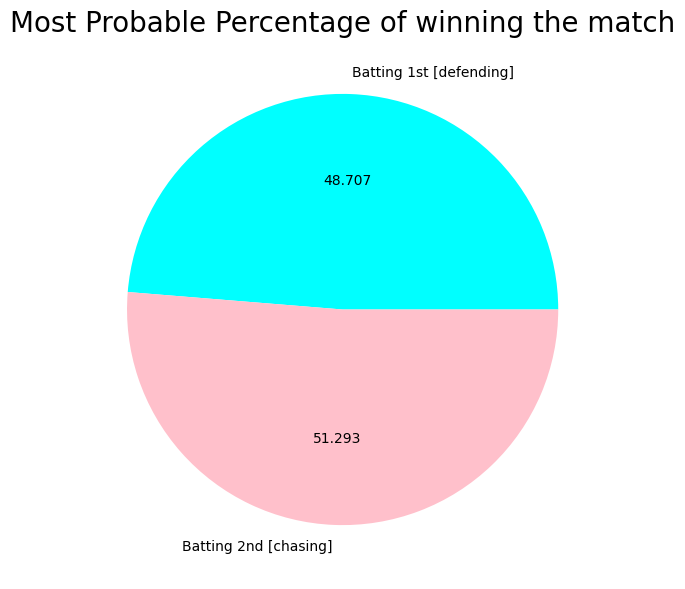

In [70]:
import matplotlib.pyplot as plt
l  = ["Batting 1st [defending]", "Batting 2nd [chasing]"]
a = [no_win_ing1, no_win_ing2]
plt.figure(figsize =([7, 7]))
plt.pie(a, labels=l, autopct="%.3f", colors=["aqua", "pink"])
plt.title("Most Probable Percentage of winning the match", fontsize = 20)
plt.show()

# Wins depending on the team's captain

In [71]:
captain_wins = pd.read_excel('captains_wins.xlsx')
captain_wins

,Player,Span,Mat,Won,Lost,Tied,NR,%
0,AJ Finch (AUS),2014-2022,76,40,32,1,3,55.47
1,MS Dhoni (INDIA),2007-2016,72,41,28,1,2,59.28
2,EJG Morgan (ENG),2012-2022,72,42,27,2,1,60.56
3,KS Williamson (NZ),2012-2022,67,35,30,1,1,53.78
4,Babar Azam (PAK),2019-2022,63,38,20,0,5,65.51
...,...,...,...,...,...,...,...,...
114,Raza Iqbal (NOR),2019-2021,10,2,8,0,0,20.00
115,MJ Santner (NZ),2020-2022,10,8,1,0,1,88.88
116,HAM Shah (DEN),2019-2022,10,4,4,0,2,50.00
117,Shaheryar Butt (Belg),2019-2021,10,6,4,0,0,60.00


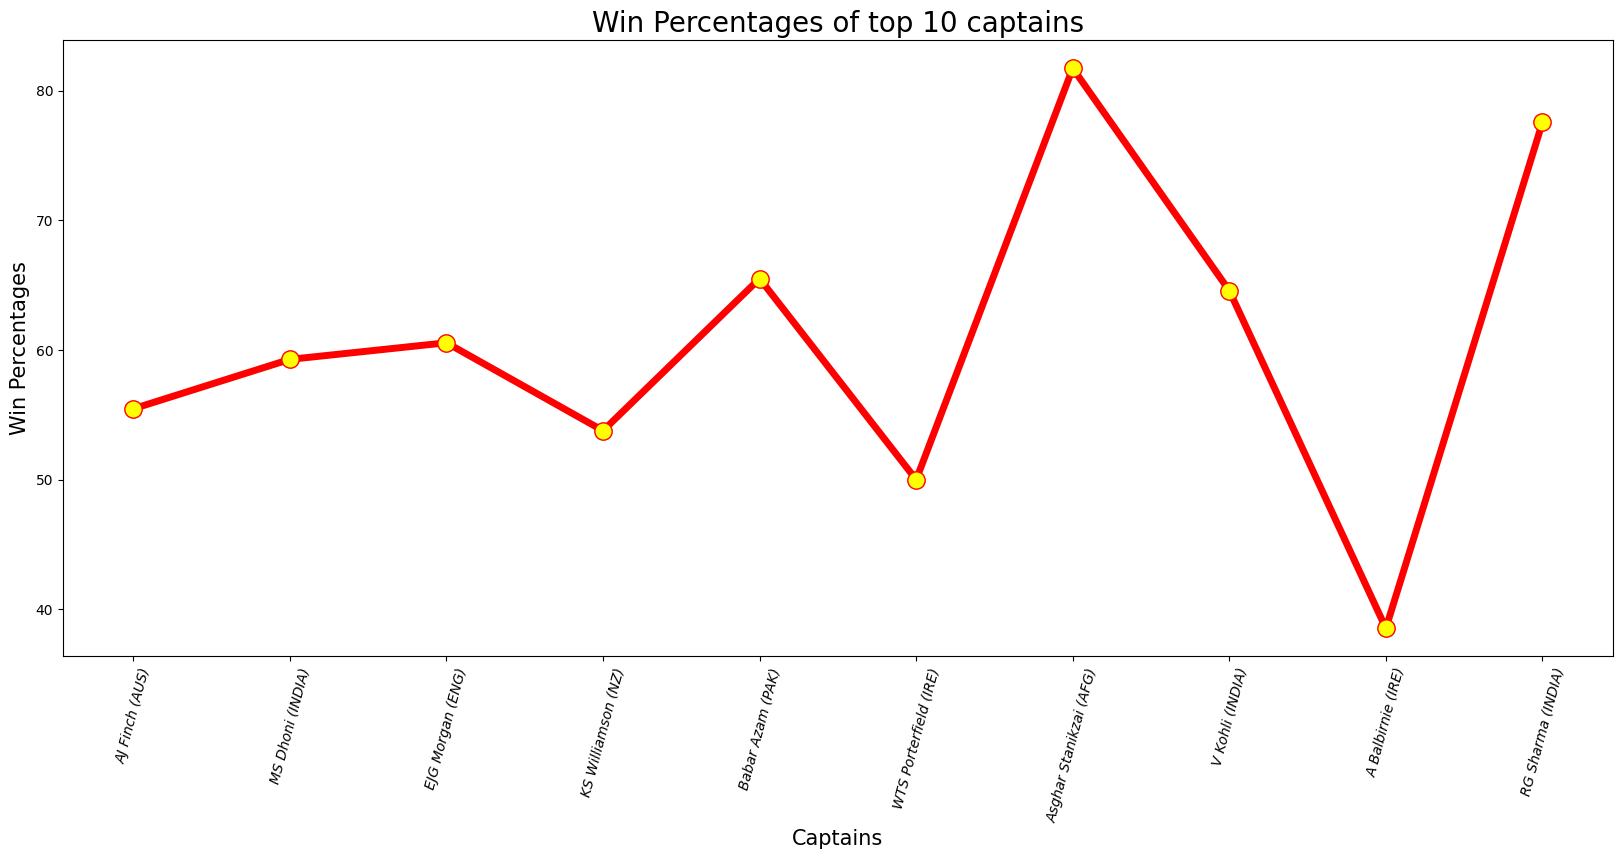

In [75]:
plt.figure(figsize=[20, 8])
plt.plot(captain_wins['Player'].head(10), captain_wins['%'].head(10), color="red", linewidth=5, marker='.', markersize=25, mfc="yellow")
plt.xticks(rotation=75, fontstyle="oblique")
plt.xlabel("Captains", fontsize=15)
plt.ylabel("Win Percentages", fontsize=15)
plt.title("Win Percentages of top 10 captains", fontsize=20)
plt.show()

In [77]:
stadiums = pd.read_excel('t20_all_matches.xlsx')



In [245]:
set(stadiums['Winner'])

{'Afghanistan',
 'Argentina',
 'Australia',
 'Austria',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Belgium',
 'Belize',
 'Bermuda',
 'Bhutan',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Cayman Is',
 'Chile',
 'Cook Islands',
 'Croatia',
 'Cyprus',
 'Czech Rep.',
 'Denmark',
 'England',
 'Fiji',
 'Finland',
 'France',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Guernsey',
 'Hong Kong',
 'Hungary',
 'India',
 'Indonesia',
 'Ireland',
 'Isle of Man',
 'Israel',
 'Italy',
 'Japan',
 'Jersey',
 'Kenya',
 'Kuwait',
 'Luxembourg',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mexico',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Norway',
 'Oman',
 'P.N.G.',
 'Pakistan',
 'Panama',
 'Peru',
 'Philippines',
 'Portugal',
 'Qatar',
 'Romania',
 'Rwanda',
 'Samoa',
 'Saudi Arabia',
 'Scotland',
 'Serbia',
 'Seychelles',
 'Sierra Leone',
 'Singapore',
 'South Africa',
 'Spain',
 'Sri Lanka',
 'Swaziland',
 'Sweden',
 'Switzerland',
 'Tanzania',
 'T

In [78]:
stadiums.columns

Index(['Team 1', 'Team 2', 'Winner', 'Margin', 'Ground', 'Match Date',
       'Scorecard'],
      dtype='object')

In [246]:
teams = ['Ground','Afghanistan',
 'Australia',
 'Bangladesh',
 'England',
 'India',
 'New Zealand',
 'Pakistan',
 'South Africa',
 'Sri Lanka',
 'Zimbabwe']
team_ground_win = pd.DataFrame(columns=teams)

In [247]:
team_ground_win['Ground']= list(set(stadiums['Ground']))
team_ground_win.fillna(0, inplace=True)
team_ground_win = team_ground_win.set_index("Ground", drop = True)
team_ground_win

,Afghanistan,Australia,Bangladesh,England,India,New Zealand,Pakistan,South Africa,Sri Lanka,Zimbabwe
Ground,,,,,,,,,,
Harare,0,0,0,0,0,0,0,0,0,0
Chattogram,0,0,0,0,0,0,0,0,0,0
The Hague,0,0,0,0,0,0,0,0,0,0
Vinor,0,0,0,0,0,0,0,0,0,0
Doha,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
Centurion,0,0,0,0,0,0,0,0,0,0
Tolerance Oval,0,0,0,0,0,0,0,0,0,0
Edinburgh,0,0,0,0,0,0,0,0,0,0


In [248]:
import numpy as np
team_lost = np.array([])
team_won = np.array([])
grounds_won = np.array([])
grounds = [x if (type(x)==str) else "" for x in stadiums['Ground']]
t1 = [x if (type(x)==str) else "" for x in stadiums['Team 1']]
t2 = [x if (type(x)==str) else "" for x in stadiums['Team 2']]
winners = [x if (type(x)==str) else "" for x in stadiums['Winner']]
for i in range(1735):
    if(t1[i]==winners[i]):
        team_won = np.append(team_won, t1[i])
        grounds_won = np.append(grounds_won, grounds[i])
        team_lost = np.append(team_lost, t2[i])
    else:
        team_won = np.append(team_won, t2[i])
        team_lost = np.append(team_lost, t1[i])
        grounds_won = np.append(grounds_won, grounds[i])

# functions for calculating total matches played and matches won by a team on a ground

In [249]:
def findWinGround(a, gr):
    count=0
    for i in range(1735):
        if(winners[i]==a and grounds_won[i]==gr):
            count+=1
    return count
def findMatchesGround(a, gr):
    count=0
    for i in range(1735):
        if((t1[i]==a or t2[i] ==a) and grounds_won[i]==gr):
            count+=1
    return count


# win probability of a team in t20i over a specific ground

In [250]:
for i in ['Afghanistan', 'Australia', 'Bangladesh', 'England', 'India',
       'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka', 'Zimbabwe']:
       for j in list(set(stadiums['Ground'])):
            if (findMatchesGround(i, j)==0):
               continue
            team_ground_win.loc[j, i]=("{:.3f}".format(findWinGround(i, j)/findMatchesGround(i, j)*100))

team_ground_win

,Afghanistan,Australia,Bangladesh,England,India,New Zealand,Pakistan,South Africa,Sri Lanka,Zimbabwe
Ground,,,,,,,,,,
Harare,100.000,60.000,50.000,0,80.000,100.000,85.714,0,0,17.241
Chattogram,25.000,0,50.000,25.000,0,50.000,0,75.000,83.333,50.000
The Hague,0,0,33.333,0,0,100.000,0,0,0,0
Vinor,0,0,0,0,0,0,0,0,0,0
Doha,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
Centurion,0,100.000,0,100.000,0.000,0,100.000,30.000,0.000,0
Tolerance Oval,0,100.000,0,0,0,0,0,0,0,0
Edinburgh,0,0,0,0,0,100.000,100.000,0,0,66.667


In [251]:
team_ground_win.to_excel("GroundEffect.xlsx")

# functions for calculating total matches played and matches won by a team against other team

In [260]:
teams = ['against','Afghanistan',
 'Australia',
 'Bangladesh',
 'England',
 'India',
 'New Zealand',
 'Pakistan',
 'South Africa',
 'Sri Lanka',
 'Zimbabwe']
aga = ['Afghanistan',
 'Australia',
 'Bangladesh',
 'England',
 'India',
 'New Zealand',
 'Pakistan',
 'South Africa',
 'Sri Lanka',
 'Zimbabwe']
team_against_team = pd.DataFrame(columns=teams)

In [261]:
team_against_team['against']= aga
team_against_team.fillna(0, inplace=True)
team_against_team = team_against_team.set_index("against", drop = True)
team_against_team

,Afghanistan,Australia,Bangladesh,England,India,New Zealand,Pakistan,South Africa,Sri Lanka,Zimbabwe
against,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0
Australia,0,0,0,0,0,0,0,0,0,0
Bangladesh,0,0,0,0,0,0,0,0,0,0
England,0,0,0,0,0,0,0,0,0,0
India,0,0,0,0,0,0,0,0,0,0
New Zealand,0,0,0,0,0,0,0,0,0,0
Pakistan,0,0,0,0,0,0,0,0,0,0
South Africa,0,0,0,0,0,0,0,0,0,0
Sri Lanka,0,0,0,0,0,0,0,0,0,0


In [262]:
def findWinTeam(a, gr):
    count=0
    for i in range(1735):
        if(team_won[i]==a and team_lost[i]==gr):
            count+=1
    return count
def totalWinVsTeam(a, gr):
    count=0
    for i in range(1735):
        if((team_won[i]==a and team_lost[i] ==gr) or (team_won[i]==gr and team_lost[i] ==a) ):
            count+=1
    return count

In [263]:
for i in ['Afghanistan', 'Australia', 'Bangladesh', 'England', 'India',
       'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka', 'Zimbabwe']:
       for j in ['Afghanistan', 'Australia', 'Bangladesh', 'England', 'India',
       'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka', 'Zimbabwe']:
               if (totalWinVsTeam(i, j)==0):
                    continue
               team_against_team.loc[j, i]=("{:.3f}".format(findWinTeam(i, j)/totalWinVsTeam(i, j)*100))

team_against_team

,Afghanistan,Australia,Bangladesh,England,India,New Zealand,Pakistan,South Africa,Sri Lanka,Zimbabwe
against,,,,,,,,,,
Afghanistan,0,100.000,33.333,100.000,100.000,100.000,100.000,100.000,75.000,7.692
Australia,0.000,0,44.444,55.000,62.500,38.462,52.174,31.250,46.154,0.000
Bangladesh,66.667,55.556,0,100.000,90.909,83.333,92.308,100.000,69.231,36.842
England,0.000,45.000,0.000,0,55.000,47.826,39.130,47.619,23.077,0
India,0.000,37.500,9.091,45.000,0,35.294,30.000,42.105,34.783,20.000
New Zealand,0.000,61.538,16.667,52.174,64.706,0,54.167,77.778,33.333,0.000
Pakistan,0.000,47.826,7.692,60.870,70.000,45.833,0,48.000,52.941,13.333
South Africa,0.000,68.750,0.000,52.381,57.895,22.222,52.000,0,35.000,16.667
Sri Lanka,25.000,53.846,30.769,76.923,65.217,66.667,47.059,65.000,0,0.000


In [264]:
team_against_team.to_excel("t20_tvt.xlsx")